In [1]:
import os

import numpy as np

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score, \
    precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

import EDA
import Plotting
from Features_Selection import feature_selection_kbest
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer, MinMaxScaler
from Logistic_Regression import Logistic_regression
from SVM_classifier import SVM_classifier

count_features = False
discretization_bool = True
problem_is_binarized = False
normalization = False
standardization = False
preproc = True


# used algorithms : Logistic Regression, DecisionTree, Clustering (K-means for evaluate number of classes)


def plot_metrics_for_each_features(names_cols, X, name_png):
    figures = []
    try:
        os.makedirs("./plots")
    except FileExistsError:
        # directory already exists
        pass
    for i in names_cols:
        figure = sns.displot(X, x=i)
        figures.append(figure)

        figure.savefig("./plots/" + str(i) + name_png)
        plt.close()  # plot close per chiudere la finestra di plot, onde evitare troppi  (>20)\
        # ed avere un errore a Runtime


def splitting_train_test(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, random_state=0, train_size=0.7
    )
    return X_train, X_test, Y_train, Y_test


def select_best_features_with_kbest(X, Y, title):
    X_train, X_test, Y_train, Y_test = splitting_train_test(X, Y)
    for i in range(3, 28):




        title = "Learning Curves with "+title
        X_new = SelectKBest(k= i).fit_transform(X_train, Y_train)

        Plotting.plot_lc_curve(X_train, Y_train, title, i)

        # Plotting.plot_metrics_results(Y_test, y_pred, "Logistic Regression")


def select_from_model(X, Y, clf, title):
    feature_names = X.columns
    X_train, X_test, Y_train, Y_test = splitting_train_test(X, Y)
    clf.fit(X_train, Y_train)
    model = SelectFromModel(clf, prefit=True)
    mask = model.get_support()  # list of booleans
    new_features = []  # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    X_new = pd.DataFrame(data=model.transform(X), columns=new_features)
    X_train, X_test, Y_train, Y_test = splitting_train_test(X_new, Y)
    print(" X with selection from model \n" + str(X_new))
    title = "Learning Curves with" + title + "with select from model)"
    Plotting.plot_lc_curve(X_train, Y_train, title)
    return X_new


def discretization_Age(i):
    if i in range(0, 33):
        i = 0
    elif i in range(33, 38):
        i = 1
    elif i in range(38, 43):
        i = 2
    elif i in range(43, 48):
        i = 3
    elif i in range(48, 53):
        i = 4
    elif i in range(53, 58):
        i = 5
    else:
        i = 6

    return i


def discretization_BMI(i):
    if i in range(0, 18):
        i = 0
    elif i in range(18, 25):
        i = 1
    elif i in range(25, 30):
        i = 2
    elif i in range(30, 35):
        i = 3
    elif i in range(35, 40):
        i = 4
    elif i in range(53, 58):
        i = 5

    return i


def discretization_WBC(i):
    if i in range(0, 4000):
        i = 0
    elif i in range(4000, 11000):
        i = 1
    elif i in range(11000, 12102):
        i = 2

    return i


def discretization_RBC(i):
    if 0 <= i < 3000000:
        i = 0
    elif 3000000 <= i < 5000000:
        i = 1
    elif 5018452 > i >= 5000000:
        i = 2

    return i


def discretization_Plat(i):
    if 93013 <= i < 100000:
        i = 0
    elif 100000 <= i < 225000:
        i = 1
    elif 225000 <= i < 226465:
        i = 2

    return i


def discretization_AST_ALT(i):
    if 0 <= i < 20:
        i = 0
    elif 20 <= i <= 40:
        i = 1
    elif 40 < i <= 128:
        i = 2

    return i


def discretization_HGB(df):
    print(df.loc[df.Gender == 1, 'HGB'])


def discretization_RNA(i):
    if 0 <= i <= 5:
        i = 0
    elif i > 5:
        i = 1

    return i


def discr_fun(X):
    X['Age'] = X['Age'].apply(discretization_Age)
    X['BMI'] = X['BMI'].apply(discretization_BMI)
    X['WBC'] = X['WBC'].apply(discretization_WBC)
    X['RBC'] = X['RBC'].apply(discretization_RBC)
    X['Plat'] = X['Plat'].apply(discretization_Plat)
    X['AST 1'] = X['AST 1'].apply(discretization_AST_ALT)
    X['ALT 1'] = X['ALT 1'].apply(discretization_AST_ALT)
    X['ALT 4'] = X['ALT 4'].apply(discretization_AST_ALT)
    X['ALT 12'] = X['ALT 12'].apply(discretization_AST_ALT)
    X['ALT 24'] = X['ALT 24'].apply(discretization_AST_ALT)
    X['ALT 36'] = X['ALT 36'].apply(discretization_AST_ALT)
    X['ALT 48'] = X['ALT 48'].apply(discretization_AST_ALT)
    X['RNA Base'] = X['RNA Base'].apply(discretization_RNA)
    X['RNA 4'] = X['RNA 4'].apply(discretization_RNA)
    X['RNA 12'] = X['RNA 12'].apply(discretization_RNA)
    X['RNA EOT'] = X['RNA EOT'].apply(discretization_RNA)
    X['RNA EF'] = X['RNA EF'].apply(discretization_RNA)

    return X


# TODO Target encoder sulle features
def converting_to_0_and_1(X):
    le = LabelEncoder()  # instanza che converte dal range [1,2,3,4] a [0,1,2,3]
    # i valori variano e possono essere 1 o 2. Li converto in 0 e 1 per maggior praticità
    X['Gender'] = le.fit_transform(X['Gender'])
    # print("Gender array: \n"+str(X['Gender']))
    X['Nausea or Vomiting'] = le.fit_transform(X['Nausea or Vomiting'])
    X['Headache '] = le.fit_transform(X['Headache '])
    X['Diarrhea '] = le.fit_transform(X['Diarrhea '])
    X['Fatigue & generalized bone ache '] = le.fit_transform(X['Fatigue & generalized bone ache '])
    X['Jaundice '] = le.fit_transform(X['Jaundice '])
    X['Epigastric pain '] = le.fit_transform(X['Epigastric pain '])

    return X


def counting_features(Y):
    if count_features:
        # inizio conteggio per ogni classe, per vedere se è bilanciato
        count_class_0 = 0
        count_class_1 = 0
        count_class_2 = 0
        count_class_3 = 0

        for i in Y:
            # print(i)
            if i == 0:
                count_class_0 += 1
            if i == 1:
                count_class_1 += 1
            if i == 2:
                count_class_2 += 1
            if i == 3:
                count_class_3 += 1
        print("samples of class 0: " + str(count_class_0))
        print("samples of class 1: " + str(count_class_1))
        print("samples of class 2: " + str(count_class_2))
        print("samples of class 3: " + str(count_class_3))


def normalization_and_standardization(X):
    scaler = StandardScaler()
    min_max_scaler = MinMaxScaler()
    names_cols = X.columns  # nomi delle colonne
    X_std = pd.DataFrame(scaler.fit_transform(X[names_cols]), columns=names_cols)
    X_scale = pd.DataFrame(min_max_scaler.fit_transform(X[names_cols]), columns=names_cols)
    return X_std, X_scale


def binarizing_problem(i):
    if i == 1 or i == 2:
        i = 0
    if i == 3 or i == 4:
        i = 1
    return i


def label_encoding(i_y):
    i_y = i_y - 1
    return i_y

Starting EDA...


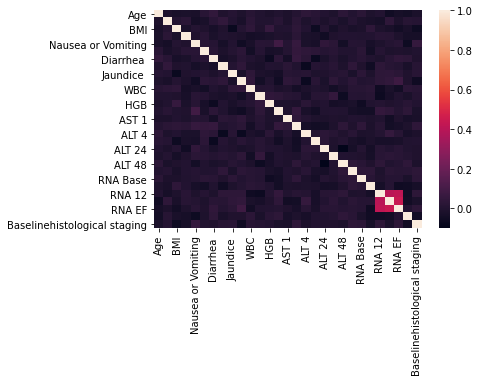

<Figure size 1440x1440 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea or Vomiting                1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [ ]:
if __name__ == '__main__':

    # Dati di input
    input_file = "./HCV-Egy-Data/HCV-Egy-Data.csv"
    df = pd.read_csv(input_file, header=0)
    print("Starting EDA...")
    EDA.analysis_dataset(df.copy())
    print("EDA finished")
    # df describe, descrive il dataset, inizio EDA

In [ ]:
    X = df.drop(columns='Baselinehistological staging')
    X_not_discret = X.copy()
    if discretization_bool:
        X = discr_fun(X)

    Y = df['Baselinehistological staging']
    Y = Y.astype(int)  # converto in type int
    X = converting_to_0_and_1(X)

    X = X.drop(columns='HGB')
    name_columns = X.columns
    print("X:\n" + str(X))
    # discretization_HGB(X) # TODO da rivedere

    # stesso preprocessing per l'array di output
    # Y = le.fit_transform(Y)

    df = pd.concat([X, Y], axis=1)
    print("DF after preprocessing: \n" + str(df))
    counting_features(Y)  # conto le features

    X_std, X_min_max = normalization_and_standardization(X)

    # TODO countplot, displot, pieplot, barplot, violin plot, pairplot
    # countplot ==> mette a confronto della classe target, feature più rilevante

    # print(names_cols + "\n" + str(len(names_cols)))
    # plot and save images, not preprocessing
    # plot_metrics_for_each_features(names_cols, X, "_not_preprocessing")

    # plot and save images, with standardizationount_class_0 = 0

    # plot_metrics_for_each_features(names_cols, X_std, "_standardized")

    # plot and save images, with min max scaler
    # plot_metrics_for_each_features(names_cols, X_scale, "min_max_scaler")

    if problem_is_binarized:
        Y = Y.apply(binarizing_problem)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, random_state=0, train_size=0.70
    )

    # -----------------------Feature Selection---------------------------------
    clf_KNN_no_feat_sel = KNeighborsClassifier()
    #select_best_features_with_kbest(X,Y, "K best")


    if problem_is_binarized:
        clf_DT = Pipeline(
            [('feature_selection', SelectFromModel(DecisionTreeClassifier(random_state=0))),
             ('classification', DecisionTreeClassifier(random_state=0))])
        clf_KNN = KNeighborsClassifier()
        njobs = 4



    else:

        clf_DT = Pipeline(
            [('feature_selection', SelectFromModel(DecisionTreeClassifier())),
             ('classification', DecisionTreeClassifier())])

        njobs = 4
        clf_KNN = Pipeline([('selector', SelectKBest(k=7)), ('classifier', KNeighborsClassifier(n_jobs=njobs))])

    # --------------------------------END FEATURES SELECTION--------------------------------

    if standardization:
        normalization = False
        X_train_std, X_test_std, Y_train, Y_test = train_test_split(
            X_std, Y, random_state=0, train_size=0.70
        )

        clf_DT.fit(X_train_std, Y_train)
        clf_KNN.fit(X_train_std, Y_train)
        y_pred_1 = clf_DT.predict(X_test_std)
        y_pred_2 = clf_KNN.predict(X_test_std)

    elif normalization:
        standardization = False

        X_train_minmax, X_test_minmax, Y_train, Y_test = train_test_split(
            X_min_max, Y, random_state=0, train_size=0.70
        )

        clf_DT.fit(X_train_minmax, Y_train)
        clf_KNN.fit(X_train_minmax, Y_train)
        y_pred_1 = clf_DT.predict(X_test_minmax)
        y_pred_2 = clf_KNN.predict(X_test_minmax)
    else:
        # analisi bontà del clustering
        clf_DT.fit(X_train, Y_train)
        clf_KNN.fit(X_train, Y_train)
        y_pred_1 = clf_DT.predict(X_test)
        y_pred_2 = clf_KNN.predict(X_test)

    # clustering(X_train)
    # clustering(X_test)
    # sns.displot(data=Y_test, x=Y_test.classes_)
    # plt.show()
    print("Preprocessing applied? " + str(preproc))
    print("Analysis with Discretization: " + str(discretization_bool))
    print("Problem is Binarized ?: " + str(problem_is_binarized))
    print("Standardization applied ? : " + str(standardization))
    print("Normalization applied? : " + str(normalization))

    print("accuracy score for KNeighbors: " + str(accuracy_score(Y_test, y_pred_2)))
    print("accuracy score for Decision tree: " + str(accuracy_score(Y_test, y_pred_1)))
    print("classification report for KNeighbors: \n" + str(classification_report(Y_test, y_pred_2)))
    print("classification report for Decision tree:\n " + str(classification_report(Y_test, y_pred_1)))

    # select_from_model(X, Y, clf)
